In [17]:
import pandas as pd
import duckdb
import matplotlib.pyplot as plt

In [ ]:
tabla_partidos_suizos = duckdb.sql('''
                                   SELECT Temporada, SUM(Goles_local) AS Goles_local, SUM(Goles_visitante) AS Goles_visitante
                                   FROM tabla_partidos.csv
                                   WHERE ID_liga = 24558 
                                   AND CAST(TEMPORADA AS TEXT) IN ('2012/2013','2013/2014','2014/2015','2015/2016')
                                   GROUP BY Temporada
                                   ORDER BY Temporada
                                   ''')
tabla_chica_goles = tabla_partidos_suizos.df()
tabla_chica_goles

In [48]:
tabla_partidos_suizos = duckdb.sql('''
                                   SELECT ID_local
                                   FROM tabla_partidos.csv
                                   WHERE ID_liga = 24558 
                                   AND CAST(TEMPORADA AS TEXT) IN ('2012/2013','2013/2014','2014/2015','2015/2016')
                                   
                                   ''')
tabla_partidos_suizos

┌────────────┐
│  ID_local  │
│   int64    │
├────────────┤
│       9777 │
│      10190 │
│       9777 │
│      10190 │
│      10191 │
│       9931 │
│      10192 │
│      10243 │
│       7730 │
│       9931 │
│         ·  │
│         ·  │
│         ·  │
│       7896 │
│      10179 │
│       9824 │
│      10192 │
│      10199 │
│       9956 │
│      10190 │
│       9824 │
│      10199 │
│       9931 │
├────────────┤
│  720 rows  │
│ (20 shown) │
└────────────┘

In [ ]:
fig, ax = plt.subplots()
ax.plot('Temporada', 'Goles_local', data = tabla_chica_goles)
ax.plot('Temporada', 'Goles_visitante', data =tabla_chica_goles)

In [56]:
goles_por_equipo_local = duckdb.sql('''
                               SELECT ID_local AS ID_equipo, Temporada, Goles_local
                               FROM tabla_partidos.csv
                               WHERE ID_liga = 24558 
                               AND CAST(TEMPORADA AS TEXT) IN ('2012/2013','2013/2014','2014/2015','2015/2016')
                               ORDER BY ID_local
                               ''')
goles_por_equipo_visitante = duckdb.sql('''
                                        SELECT ID_visitante AS ID_equipo, Temporada, Goles_visitante
                                        FROM tabla_partidos.csv
                                        WHERE ID_liga = 24558 
                                        AND CAST(TEMPORADA AS TEXT) IN ('2012/2013','2013/2014','2014/2015','2015/2016')
                                        ORDER BY ID_visitante
                                        ''')

goles_por_equipo = duckdb.sql('''
                              SELECT ID_equipo, Temporada, Goles_local AS Goles
                              FROM goles_por_equipo_local
                              UNION ALL
                              SELECT ID_equipo, Temporada, Goles_visitante
                              FROM goles_por_equipo_visitante
                              
                              ''')
#deberian ser 720 partidos y acá me da 216
# porque el union me saca los repetidos... pero UNION ALL NO
tabla_promedio_gol = duckdb.sql('''
                                SELECT ID_equipo, Temporada, AVG(Goles)
                                FROM goles_por_equipo
                                GROUP BY ID_equipo, Temporada
                                ORDER BY ID_equipo, Temporada
                                ''')
promedios_por_temporada_todos = duckdb.sql('''
                                SELECT Temporada, AVG(Goles) AS Promedio_gol
                                FROM goles_por_equipo
                                GROUP BY Temporada
                                ORDER BY  Temporada
                                ''')
df_promiedos = promedios_por_temporada_todos.df()

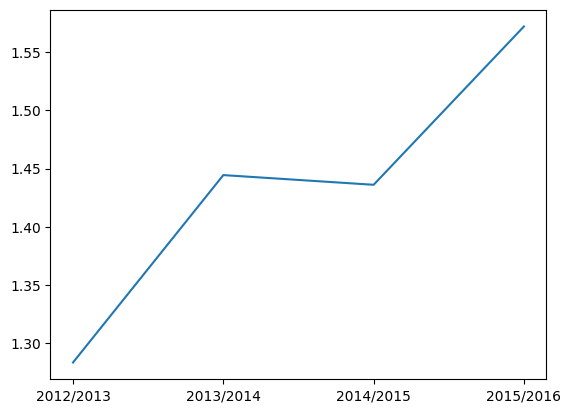

In [57]:
fig, ax =plt.subplots()
ax.plot('Temporada', 'Promedio_gol', data = df_promiedos)